# インポート

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# tensorflowをインポート
import tensorflow as tf
# Kerasからモデル関連のインポート
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
# Kerasからトレーニング関連のインポート
from tensorflow.keras.optimizers import SGD # 最適化アルゴリズム
from tensorflow.keras.utils import to_categorical

# MNISTデータをロード

In [ ]:
# mnistをインポート
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print the shape of data
print('x_train shape (サンプル数 x 縦 x 横): ', x_train.shape)
print('y_train shape (サンプル数)             : ', y_train.shape)
print('x_test shape (サンプル数 x 縦 x 横) : ', x_test.shape)
print('y_test shape (サンプル数)              : ', y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


# まずはデータを見てみよう

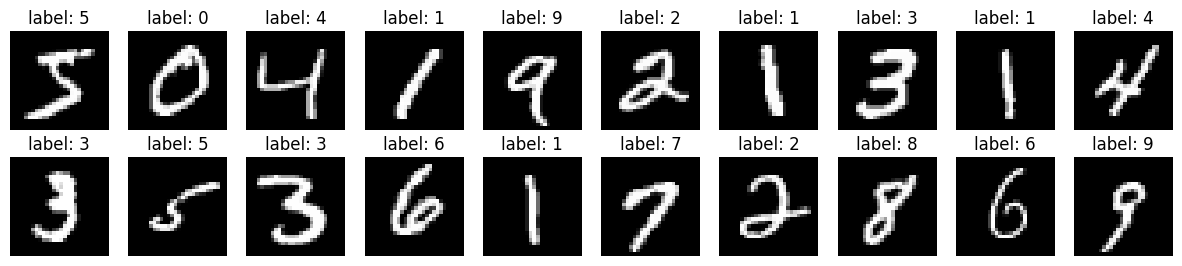

In [ ]:
# 2x10のsubplotsでmnistのデータとラベルを表示する
fig, ax = plt.subplots(2,10, figsize=(15,3))
for i in range(2):
    for j in range(10):
        ax[i][j].imshow(x_train[i*10+j], cmap='gray')
        # タイトルにラベルを表示する
        ax[i][j].set_title(f'label: {y_train[i*10+j]}')
        ax[i][j].axis('off')
plt.show()

# データを整形する

In [ ]:
# 画像のピクセル値を１列に並べ替える
x_train_flattened = x_train.reshape(x_train.shape[0],-1).astype('float32') / 255
x_test_flattened  = x_test.reshape(x_test.shape[0], -1).astype('float32') / 255
num_features = x_train_flattened.shape[1]  # Get the length of each data
print('x_train_flattened shape:', x_train_flattened.shape)

x_train_flattened shape: (60000, 784)


In [ ]:
# set parameters
num_epochs = 1 # number of epoch
batch_size = 128 # number of mini-batch
verbose = 1 # verbose level
num_classes = 10 # number of labels (0 ~ 9)
optimizer = SGD() # optimizer
num_hidden_units = 128 # number of hidden layers
validation_split = 0.2 # ratio to split train data into validation data

# one-hot encoding

In [ ]:
# one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print('y_train shape             :', y_train.shape)
print('y_train_one_hot shape:', y_train_one_hot.shape)
print('orignal label         :  ', y_train[0])
print('data after one_hot: ', y_train_one_hot[0])

y_train shape             : (60000,)
y_train_one_hot shape: (60000, 10)


# モデルを作る (MLP)

In [ ]:
# Kerasでニューラルネットワーク（順伝播型）を作る
model = Sequential()  # モデルの入れ物を作成
# 1つ目の全結合層（隠れ層）
model.add(Dense(num_hidden_units, input_dim=num_features))
# → 入力層（input_dim=num_features）から隠れ層へつなぐ
# → num_hidden_units は隠れ層のニューロンの数
model.add(Activation('relu'))  # 活性化関数 ReLU（0以下をカットし、非線形性を持たせる）
# 2つ目の全結合層（出力層）
model.add(Dense(num_classes))
# → 隠れ層から出力層へつなぐ
# → num_classes は分類クラス数（例：3クラスならnum_classes=3）
model.add(Activation('softmax'))
# → 出力を確率に変換（各クラスの確率を0〜1にし、合計が1になるようにする）

# モデルのコンパイル（学習の準備）
model.compile(loss='categorical_crossentropy',# 損失関数（分類問題なので交差エントロピーを使用）
              optimizer=optimizer,# 最適化アルゴリズム（例: 'adam' など）
              metrics=['accuracy'])# 学習の評価指標として正解率（accuracy）を使用

model.summary()
print('インプットと隠れ層の間のノード（ニューロン）の組み合わせ： ', num_features*128)
print('インプットと隠れ層の間のバイアスの数　　　　　　　　　　： ', 128)
print('合計のパラメータ数　　　　　　　　　　　　　　　　　　　： ', num_features*128 + 128)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

インプットと隠れ層の間のノード（ニューロン）の組み合わせ：  100352
インプットと隠れ層の間のバイアスの数　　　　　　　　　　：  128
合計のパラメータ数　　　　　　　　　　　　　　　　　　　：  100480


In [ ]:
history = model.fit(x_train_flattened,
                    y_train_one_hot,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=verbose,
                    validation_split=validation_split)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5183 - loss: 1.7111 - val_accuracy: 0.8520 - val_loss: 0.7260


In [ ]:
prediction = model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# test the trained model
score = model.evaluate(x_test_flattened, y_test_one_hot, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7363355755805969
Test accuracy: 0.8452000021934509


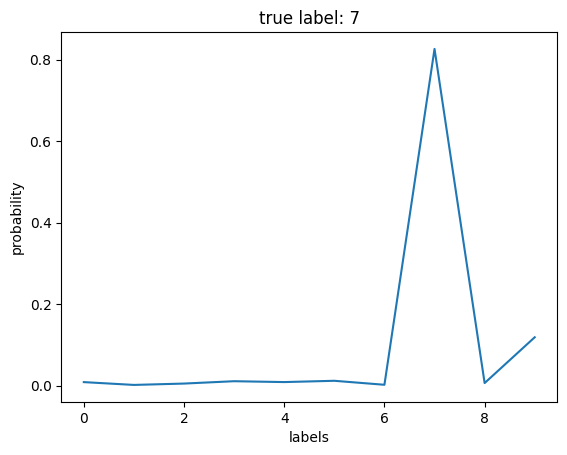

In [ ]:
plt.plot(prediction[0])
plt.title(f'true label: {y_test[0]}')
plt.xlabel('labels')
plt.ylabel('probability')
plt.show()

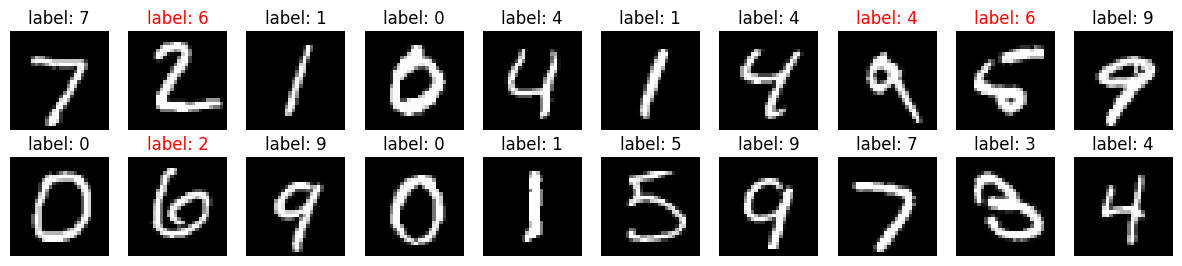

In [ ]:
prediction = np.argmax(prediction, axis=1)

# 2x10のsubplotsでmnistのデータとラベルを表示する
fig, ax = plt.subplots(2,10, figsize=(15,3))
for i in range(2):
    for j in range(10):
        ax[i][j].imshow(x_test[i*10+j], cmap='gray')
        # タイトルにラベルを表示する
        if y_test[i*10+j] == prediction[i*10+j]:
          ax[i][j].set_title(f'label: {prediction[i*10+j]}')
        else:
          ax[i][j].set_title(f'label: {prediction[i*10+j]}', color='red')
        ax[i][j].axis('off')
plt.show()